<a href="https://colab.research.google.com/github/MKolaksazov/Data-Science/blob/main/Colab%20code%20(graphs)/Gouped_bars_many_variants.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# THIS COLAB NOTEBOOK SHOULD BE USED TO CALCULATE AND DRAW STACKED AND GROUPED BAR GRAPHS

#!pip install statsmodels==0.13.5

In [2]:
# PARAMETERS
csv_file = '/content/sm_bca_colin_24_mMg.csv' #'/content/sm_chl_24.csv' #"/content/lupin_PM_0602_ew.csv" #/content/lupina-params-1.csv
csv_file_ltrs = '/content/sm_bca_240826_tac.csv' #'/content/sm_chl_24_colab.csv'
csv = '/content/ca_ojip_april_may_all - ca_ojip_240426_all.xlsx - ca_ojip_240426_all.csv'
csv1 = '/content/ca_bca_all_0920.csv'

In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv(csv, delimiter=',', decimal='.')

In [4]:
df = df.dropna()
unique_key = 'month'
unique_column = pd.unique(df[unique_key].values).tolist()
"""
methods = df.columns.values
methods = np.delete(methods, 0)
"""
unique_column

['April', 'May']

In [5]:
label_order = ['n1', 'n2', 'n3', 'n4', 'n5', 'n6', #'n7',
               'n8', 'n9', 'n10', 'n11', 'n12', 'n13', 'n14', 'n15', #'n16',
               'n17', #'n18',
               'n19', 'n20', 'n21', 'n22', 'xA', 'xB', 'xC', 'xD', #'xF', 'xG'
                ]

label_order1 = [
    'Lp', 'Lp N',
    'Ac', 'Ac N', 'Ad', 'Ad N',
    'Fa', 'Fa N', 'Fp', 'Fp N', 'Fr', 'Fr N', 'Bi', 'Bi N',
]

In [6]:
# Get a list of rows to keep
rows_to_keep = df['groups'].apply(lambda x: x in label_order)

# Filter the DataFrame
df = df[rows_to_keep]

# Print the resulting DataFrame to verify
df

,groups,index,month,Bckg,Fo,Fj,Fi,Fm,Fv,Vj,...,Psi_o,Phi_Eo,Phi_Do,Phi_Pav,Pi_Abs,ABS/RC,TRo/RC,ETo/RC,DIo/RC,Phi_Ro
0,n1,1,April,357,6177,17036,23636,34754,28577,0.380,...,0.620,0.510,0.178,930.644,5.131,1.471,1.210,0.750,0.261,0.319906
1,n1,2,April,149,5603,14915,21386,32343,26740,0.348,...,0.652,0.539,0.173,924.424,6.482,1.378,1.139,0.742,0.239,0.338775
2,n1,3,April,390,5754,15475,21782,32803,27049,0.359,...,0.641,0.528,0.175,922.991,5.869,1.428,1.177,0.754,0.250,0.335975
3,n2,4,April,390,6014,17718,26073,38850,32836,0.356,...,0.644,0.544,0.155,931.565,7.211,1.367,1.156,0.744,0.212,0.328880
4,n2,5,April,149,5703,16530,24835,37328,31625,0.342,...,0.658,0.557,0.153,932.786,8.033,1.326,1.123,0.739,0.203,0.334682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,xA,121,May,390,6274,17133,22790,35469,29195,0.372,...,0.628,0.517,0.177,912.803,5.346,1.470,1.210,0.760,0.260,0.357231
156,xA,122,May,390,6372,17523,23993,37160,30788,0.362,...,0.638,0.528,0.171,914.950,5.703,1.492,1.236,0.788,0.256,0.354609
157,xC,123,May,390,7380,21489,27862,40606,33226,0.425,...,0.575,0.471,0.182,925.093,3.660,1.667,1.364,0.785,0.303,0.314209
158,xC,124,May,390,7185,21229,28447,41354,34169,0.411,...,0.589,0.487,0.174,928.357,4.027,1.692,1.398,0.824,0.294,0.312325


In [7]:
df = df.sort_values(by='groups', key=lambda x: x.map(lambda x: label_order.index(x)))

In [8]:
data = pd.DataFrame({unique_key:[], 'mean':[], 'error':[]})
# Групиране на данните по варианти и изчисляване на средната стойност и стандартната грешка
def make_mean_err(column_name, df):
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce')
    stat_result = df.groupby(['groups'], as_index=False, sort=False).agg({column_name:['mean','std']})
    menMeans = stat_result[column_name]['mean']
    menStd = stat_result[column_name]['std']
    stat_result_df = pd.DataFrame({'mean': menMeans, 'error': menStd})
    return stat_result_df

for single_v in unique_column:
    month_df = df[df[unique_key] == single_v]
    method = 'Pi_Abs'
    result = make_mean_err(method, month_df)
    # Create a temporary DataFrame with the method name
    #temp_df = pd.DataFrame({'method': [method] * len(result), 'mean': result['mean'], 'error': result['error']})
    temp_df = pd.DataFrame({unique_key: single_v, 'mean': result['mean'], 'error': result['error']})
    # Concatenate the temporary DataFrame with the main data DataFrame
    data = pd.concat([data, temp_df], ignore_index=True)

print (data)

    month      mean     error
0   April  5.827333  0.676463
1   April  6.305750  1.557575
2   April  4.352667  1.045613
3   April  6.802667  2.947620
4   April  4.390500  1.110119
5   April  3.564333  0.511615
6   April  4.479000  1.153047
7   April  4.332750  0.785329
8   April  4.836000  0.905093
9   April  5.059333  1.627273
10  April  5.077250  1.192041
11  April  5.769333  0.711517
12  April  3.241333  0.077835
13  April  4.563000  1.534717
14  April  4.251333  0.926952
15  April  6.832667  1.158315
16  April  5.949750  0.880093
17  April  6.092667  0.453335
18  April  5.172333  0.469973
19  April  6.072333  0.992767
20  April  7.328333  1.144746
21  April  5.648667  1.343985
22  April  6.346667  1.805073
23    May  3.483333  1.016653
24    May  3.861333  1.649584
25    May  3.721667  0.340086
26    May  6.245667  0.624937
27    May  8.062000  0.410830
28    May  2.824333  0.790727
29    May  3.867667  1.463805
30    May  6.277667  0.089891
31    May  7.559333  0.901935
32    May 

<ipython-input-8-18044c171a16>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = pd.to_numeric(df[column_name], errors='coerce')
<ipython-input-8-18044c171a16>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = pd.to_numeric(df[column_name], errors='coerce')


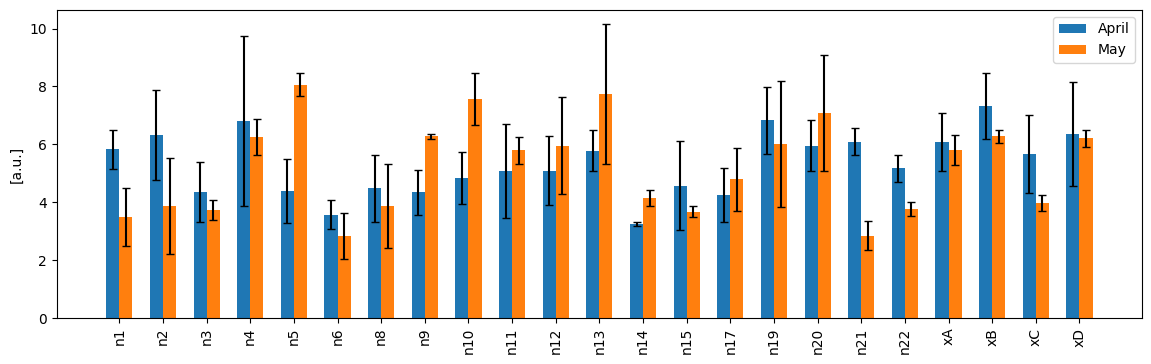

In [9]:
import matplotlib.pyplot as plt

# Plotting the grouped bar chart
fig, ax = plt.subplots(figsize=(14, 4))

unique_group = data[unique_key].unique()
bar_width = 0.3

index = np.arange(len(data) // len(unique_group))
# Extract unique group names from the original DataFrame
group_names = df['groups'].unique()

for i, k in enumerate(unique_group):
  temp_df = data[data[unique_key] == k]
  ax.bar(index + i * bar_width, temp_df['mean'], bar_width, yerr=temp_df['error'], capsize=3, label=k)

# smenqne na tickchetata
#plt.yticks([0, 100, 200, 300], ['0', '1', '2', '3'])

ax.set_ylabel('[a.u.]') #'pigments per FW [mg g$^{-1}$]')
ax.set_xticks(index + bar_width * (len(unique_group) - 1) / 2)
# Set x-axis labels to group names
ax.set_xticklabels(group_names, rotation=90)
ax.legend()

plt.show()
fig.savefig('anovatest.jpg',dpi=600,bbox_inches='tight')